# <center> Explicable Intelligence Artificielle - XAI</center>
#### <center> Initially prepared by EL ALAMI EL IDRISSI Hoda, 2018-2019</center>
#### <center>  Updated by Lina Fahed, 2022</center>



In this tutorial, we will see:
* I- Dataset handling and pre-processing
* II- Building the blackbox model: XGBoost
* III- XAI methods
    * 1- Plot importance of each variable
    * 2- Partial Dependence Plot (PDP)
    * 3- Local Interpretable Model-agnostique Explainations (LIME)
    * 4- SHapley Additive exPlanations (SHAP)


                                      

# I- Dataset handling and pre-processing

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import shap
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

shap.initjs()

**NumPy** (Numerical Python) is an open source Python library that is used in almost every field of science and engineering. It’s the universal standard for working with numerical data in Python, and it’s at the core of the scientific Python and PyData ecosystems. 

NumPy users include everyone from beginning coders to experienced researchers doing state-of-the-art scientific and industrial research and development. The NumPy API is used extensively in Pandas, SciPy, Matplotlib, scikit-learn, scikit-image and most other data science and scientific Python packages.

The NumPy library contains multidimensional array and matrix data structures. It provides **ndarray**, a homogeneous n-dimensional array object, with methods to efficiently operate on it. NumPy can be used to perform a wide variety of mathematical operations on arrays. It adds powerful data structures to Python that guarantee efficient calculations with arrays and matrices and it supplies an enormous library of high-level mathematical functions that operate on these arrays and matrices.


**Pandas** is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real-world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis/manipulation tool available in any language. It is already well on its way toward this goal.


pandas is well suited for many different kinds of data:
* Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
* Ordered and unordered (not necessarily fixed-frequency) time series data.
* Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
* Any other form of observational / statistical data sets. The data need not be labeled at all to be placed into a pandas data structure




## Upload dataset
### "Census income" dataset: learn more about this dataset here https://archive.ics.uci.edu/ml/datasets/Adult
The objective of this study is predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.
* There is **12 columns and 32561 lines**. 
* Objectif: Prediction task is to determine whether a person makes over 50K a year. 
* Label = 0 <= 50k\$
* Label = 1 > 50k\$

In [2]:
data, labels = shap.datasets.adult(display=True)
labels = np.array([int(label) for label in labels])
print('data-shape:',data.shape,', labels-shape:',labels.shape)


counter = Counter(labels)
for k,v in counter.items():
	per = v / len(labels) * 100
	print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))
    
    

data-shape: (32561, 12) , labels-shape: (32561,)
Class=0, Count=24720, Percentage=75.919%
Class=1, Count=7841, Percentage=24.081%


## Visualisation of some data

In [3]:
data.head()

Age          Workclass  Education-Num       Marital Status  \
0  39.0          State-gov           13.0        Never-married   
1  50.0   Self-emp-not-inc           13.0   Married-civ-spouse   
2  38.0            Private            9.0             Divorced   
3  53.0            Private            7.0   Married-civ-spouse   
4  28.0            Private           13.0   Married-civ-spouse   

           Occupation    Relationship    Race      Sex  Capital Gain  \
0        Adm-clerical   Not-in-family   White     Male        2174.0   
1     Exec-managerial         Husband   White     Male           0.0   
2   Handlers-cleaners   Not-in-family   White     Male           0.0   
3   Handlers-cleaners         Husband   Black     Male           0.0   
4      Prof-specialty            Wife   Black   Female           0.0   

   Capital Loss  Hours per week         Country  
0           0.0            40.0   United-States  
1           0.0            13.0   United-States  
2           0.0            40.0   United-States  
3           0.0            40.0   United-States  
4           0.0            40.0            Cuba

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             32561 non-null  float32 
 1   Workclass       32561 non-null  category
 2   Education-Num   32561 non-null  float32 
 3   Marital Status  32561 non-null  category
 4   Occupation      32561 non-null  category
 5   Relationship    32561 non-null  category
 6   Race            32561 non-null  category
 7   Sex             32561 non-null  category
 8   Capital Gain    32561 non-null  float32 
 9   Capital Loss    32561 non-null  float32 
 10  Hours per week  32561 non-null  float32 
 11  Country         32561 non-null  category
dtypes: category(7), float32(5)
memory usage: 862.2 KB



There are two class values ‘>50K‘ and ‘<=50K‘


* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **fnlwgt**: continuous. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* ****native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



## One Hot Encoding

Use "One Hot Encoding" in order to convert categorical variables into numerical variables. 

In [5]:
cat_cols = data.select_dtypes(['category']).columns
data[cat_cols] = data[cat_cols].apply(lambda x: x.cat.codes)
data.head()

Age  Workclass  Education-Num  Marital Status  Occupation  Relationship  \
0  39.0          7           13.0               4           1             1   
1  50.0          6           13.0               2           4             0   
2  38.0          4            9.0               0           6             1   
3  53.0          4            7.0               2           6             0   
4  28.0          4           13.0               2          10             5   

   Race  Sex  Capital Gain  Capital Loss  Hours per week  Country  
0     4    1        2174.0           0.0            40.0       39  
1     4    1           0.0           0.0            13.0       39  
2     4    1           0.0           0.0            40.0       39  
3     2    1           0.0           0.0            40.0       39  
4     2    0           0.0           0.0            40.0        5

## Train et Test

Split your data intro train and test subsets : 70% train, 30% test (test_size=0.3) 

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((22792, 12), (9769, 12))

In [7]:
X_train.head(3)

Age  Workclass  Education-Num  Marital Status  Occupation  \
19749  34.0          6            9.0               2           5   
1216   48.0          6           10.0               2           3   
27962  23.0          7           10.0               2          10   

       Relationship  Race  Sex  Capital Gain  Capital Loss  Hours per week  \
19749             5     4    0           0.0        2179.0            12.0   
1216              0     0    1        7688.0           0.0            40.0   
27962             0     4    1           0.0           0.0            30.0   

       Country  
19749       39  
1216        39  
27962       39

-----------------------------
# II- Building the blackbox model: XGBoost
------------------------------------

Let us now build a classification model based on XGBoost method: train the model on your training subset and test it.. in order to predict the income


#### Build the model

Note that, the function "XGBClassifier" is the one used in  scikit-learn API for the classification method XGBoost.

* n_estimators - number of trees to be adopted
* max_depth -  maximum. depth og the built tree
* base_score - initial prediction score for all instances, global biais



In [8]:
%%time
import xgboost as xgb
xgc = xgb.XGBClassifier(n_estimators=500, max_depth=5, base_score=0.5,
                        objective='binary:logistic', random_state=42)
xgc.fit(X_train, y_train)
print(xgc)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
CPU times: user 14.5 s, sys: 105 ms, total: 14.6 s
Wall time: 1.97 s




#### Prediction 
Let us now use the built XGBoost model in order to perform prediction on test dataset


In [9]:
predictions = xgc.predict(X_test)
print('predictions:', predictions[:20])

predictions: [0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0]


####  Error
RMSE: It is the square root of mean squared error (MSE).
The lower the RMSE, the better a given model is able to “fit” a dataset. 


In [11]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE: %f" % (rmse))

RMSE: 0.365774


#### Accuracy

In [10]:
# evaluate predictions
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 86.62%


Note that this XBGoost model offers a good accuracy. 
However, it is still a black box model and we need to know why such predictions have been made.

Let us try to use existing methods in order to explain this model. 
 

---------------------------------------------
# III- XAI methods
------------------------------------

## 1- Plot importance of each variable

The XGBoost library provides a built-in function to plot features ordered by their importance.

The function is called **plot_importance()** and can be used as follows:

The graph represents each feature as a horizontal bar of length proportional to the importance of a feature. Features are shown ranked in a decreasing importance order.

**importance_type (str, default "weight") –** How the importance is calculated: either “weight”, “gain”, or “cover”

* ”weight” is the number of times a feature appears in a tree

* ”gain” is the average gain of splits which use the feature

* ”cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split

Let us try these tree options: 

Text(0.5, 1.0, 'Feature Importance - POIDS')

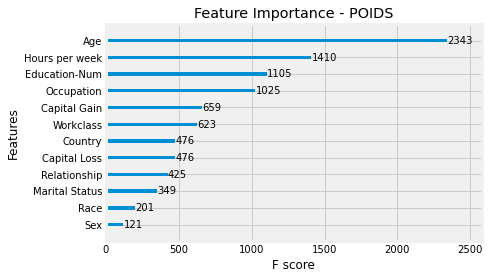

In [13]:
xgb.plot_importance(xgc, importance_type='weight')
plt.title("Feature Importance - POIDS")

Text(0.5, 1.0, 'Feature Importance - Gain moyen of splits')

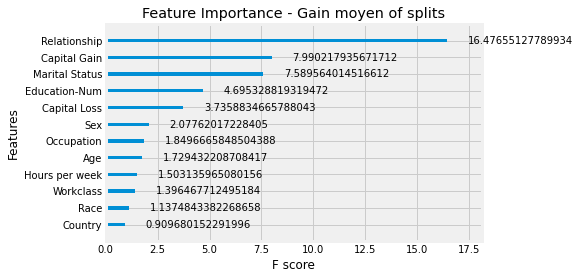

In [14]:
xgb.plot_importance(xgc, importance_type='gain')
plt.title("Feature Importance - Gain moyen of splits")

Text(0.5, 1.0, 'Feature Importance - Sample Coverage')

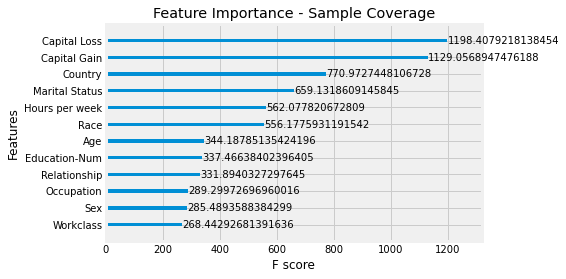

In [15]:
xgb.plot_importance(xgc, importance_type='cover')
plt.title("Feature Importance - Sample Coverage")

NOTE : We notice that different results are obtaned. It is so interesting to push the analysis farther in order to be sure about the variables that impact the most the income prediction.



--------------------------
## 2- Partial Dependence Plot (PDP)
Partial Dependence (PD) is a global and model-agnostic XAI method. Global methods give a comprehensive explanation on the entire data set, describing the impact of feature(s) on the target variable in the context of the overall data.
PDP shows the marginal effect or contribution of individual feature(s) to the predictive value of your black box model. PDP describes the marginal impact of a feature on model prediction, holding other features in the model constant. The derivative of partial dependence describes the impact of a feature (analogous to a feature coefficient in a regression model).


**PDP** : The general workflow within the skater package is to create an interpretation, create a model, and run interpretation algorithms.
An Interpretation consumes a dataset, and optionally some meta data like feature names and row ids. Internally, the Interpretation will generate a DataManager to handle data requests and sampling.
Learn more about it here https://oracle.github.io/Skater/tutorial.html 


In [12]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

In [13]:
interpreter = Interpretation(training_data=X_test, feature_names=list(data.columns))
im_model = InMemoryModel(xgc.predict_proba, examples=X_train, target_names=['$50K or less', 'More than $50K'])

#### Using PDP: show the effect of  'Age' on the model prediction

[44/44] grid cells ████████████████████ Time elapsed: 2 seconds

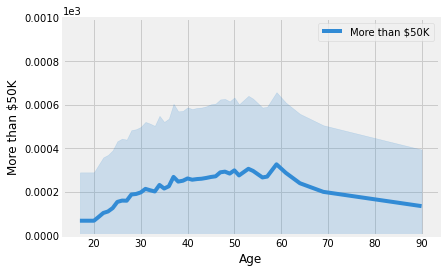

In [16]:
r = interpreter.partial_dependence.plot_partial_dependence(['Age'], im_model, grid_resolution=50, 
                                                           grid_range=(0,1), n_samples=23000, 
                                                           with_variance=True, figsize = (6, 4))
yl = r[0][1].set_ylim(0, 1)

NOTE: The probability to have a prediction of  "more than 50k$" increases sligthly with age.


 #### Using PDP: show the effect of  'Education Num' on the model prediction


[16/16] grid cells ████████████████████ Time elapsed: 1 seconds

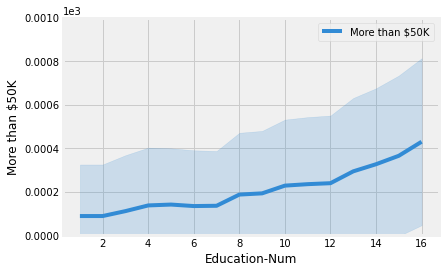

In [19]:
r = interpreter.partial_dependence.plot_partial_dependence(['Education-Num'], im_model, grid_resolution=50, 
                                                           grid_range=(0,1), n_samples=23000, 
                                                           with_variance=True, figsize = (6, 4))
yl = r[0][1].set_ylim(0, 1)

For higher education level, prediction of "more than 50k$" increases


#### Using PDP: show the effect of  'Relation' on the model prediction  

[6/6] grid cells ████████████████████ Time elapsed: 0 seconds

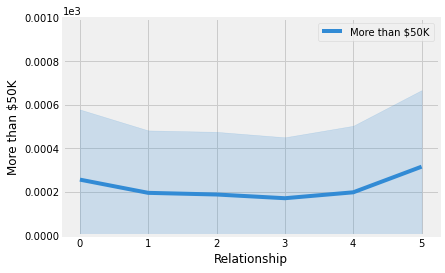

In [20]:
r = interpreter.partial_dependence.plot_partial_dependence(['Relationship'], im_model, grid_resolution=50, 
                                                           grid_range=(0,1), n_samples=23000, 
                                                           with_variance=True, figsize = (6, 4))
yl = r[0][1].set_ylim(0, 1)

0 -- Husband, 1 -- Not-in-family, 2 -- Other-relative, 3 -- Own-child, 4 -- Unmarried, 5 -- Wife 

Being married (wife 5 or husband 0) increases the prediction of having more than 50k$.

#### Using PDP: effect of both variables together a 'Age' and 'Education Num' 

[1136/1136] grid cells ████████████████████ Time elapsed: 55 seconds

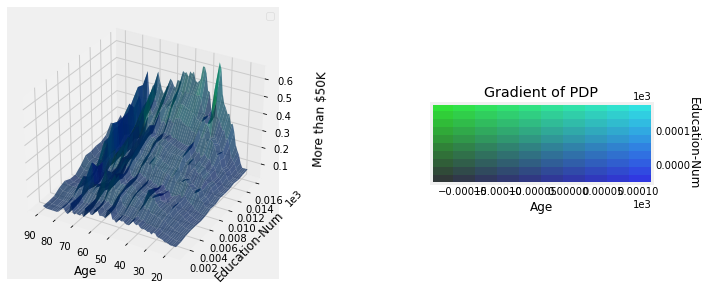

In [21]:
### ATTENTION ! this command takes several seconds to show the figures
plots_list = interpreter.partial_dependence.plot_partial_dependence([('Age', 'Education-Num')], 
                                                                    im_model, grid_range=(0,1), 
                                                                    n_samples=23000,
                                                                    figsize=(12, 5),
                                                                    grid_resolution=100)

Note that people with a high education level and who are between 30 and 50 years old have a higher probability to get a prediction of more than 50k$.



-------------------------



## 3- Local Interpretable Model-agnostique Explainations (LIME)

In [17]:
xgc_np = xgb.XGBClassifier(n_estimators=500, max_depth=5, base_score=0.5,
                        objective='binary:logistic', random_state=42)
xgc_np.fit(X_train.values, y_train)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

XGBoost has some problem related to functionalities order. For this reason we use numpy tables for LIME.


Here, we have tabular data. The function LimeTabularExplainer() can be used.

**LimeTabularExplainer** Explains predictions on tabular (i.e. matrix) data. For numerical features, perturb them by sampling from a Normal(0,1) and doing the inverse operation of mean-centering and scaling, according to the means and stds in the training data. For categorical features, perturb by sampling according to the training distribution, and making a binary feature that is 1 when the value is the same as the instance being explained.

In [18]:
from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer
##Explains predictions on tabular (i.e. matrix) data. 
##For numerical features, perturb them by sampling from a Normal(0,1) 
##and doing the inverse operation of mean-centering and scaling, 
##according to the means and stds in the training data.
##For categorical features, perturb by sampling according to the training distribution, 
##and making a binary feature that is 1 when the value is the same as the instance being explained.
exp = LimeTabularExplainer(X_test.values, feature_names=list(data.columns), 
                           discretize_continuous=True, 
                           class_names=['$50K or less', 'More than $50K'])
print(X_test)

        Age  Workclass  Education-Num  Marital Status  Occupation  \
14160  27.0          4           10.0               0           1   
27048  45.0          7            9.0               2           4   
28868  29.0          4           13.0               2           4   
5667   30.0          4           13.0               4           7   
7827   29.0          6           10.0               0           3   
...     ...        ...            ...             ...         ...   
32476  35.0          4            8.0               2           3   
21100  24.0          4           13.0               4          10   
27131  24.0          4            9.0               4           4   
25526  56.0          4           10.0               2          10   
21385  44.0          4           13.0               2          12   

       Relationship  Race  Sex  Capital Gain  Capital Loss  Hours per week  \
14160             1     4    0           0.0           0.0            38.0   
27048          

#### Example of an explanation in a case where the predictino of incomes is <= 50 000 k

**explain_instance** : Generates explanations for a prediction. First, we generate neighborhood data by randomly perturbing features from the instance (see __data_inverse). We then learn locally weighted linear models on this neighborhood data to explain each of the classes in an interpretable way (see lime_base.py).

In [19]:
doc_num = 0 ## explain for the first person in the dataset, id 14160
print('Actual Label:', y_test[doc_num])
print('Predicted Label:', predictions[doc_num])
exp.explain_instance(X_test.iloc[doc_num].values, xgc_np.predict_proba, num_features = 12).show_in_notebook()

Actual Label: 0
Predicted Label: 0


We choose to show explanation for the first person in the dataset (doc_num=0), whose id=14160. The income prediction for this person is "less than 50k$" with a probability of 1 = 100%. 

The blue variables represent the ones that explains "less than 50k$", the orange ones are related to "more than 50k$". 
For this person, we note that "capital_gain <=0.00" impacts the most this prediction, with a probability of 0.51.  






#### Example of an explanation in a case where the predictino of incomes is > 50 000 k



In [20]:
doc_num = 2 ## the case of a person whose prediction is >50k$
print('Actual Label:', y_test[doc_num])
print('Predicted Label:', predictions[doc_num])
exp.explain_instance(X_test.iloc[doc_num].values, xgc_np.predict_proba, num_features = 12).show_in_notebook()

Actual Label: 1
Predicted Label: 1


We try above to explain the case for a person whose prediction is >50k$.
We see that the prediction probability is not stable = 0.58, and that several variables impact this probability : Capital_gain, Education_Num, Marital Status, ...



---------------------------

## 4- SHapley Additive exPlanations (SHAP)

SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions 

Uses Tree SHAP algorithms to explain the output of ensemble tree models.
Tree SHAP is a fast and exact method to estimate SHAP values for tree models and ensembles of trees, under several different possible assumptions about feature dependence.


Learn more about it here:
* https://shap-lrjball.readthedocs.io/en/docs_update/index.html 
* https://shap-lrjball.readthedocs.io/en/docs_update/generated/shap.TreeExplainer.html




In [22]:
explainer = shap.TreeExplainer(xgc)
shap_values = explainer.shap_values(X_test)

In [23]:
print('Expected value:', explainer.expected_value)

Expected value: -1.4393128


#### Shapley values
**shap_values** : For models with a single output this returns a matrix of SHAP values (# samples x # features). Each row sums to the difference between the model output for that sample and the expected value of the model output (which is stored in the expected_value attribute of the explainer when it is constant). The explication is calcualted based on these values. For models with vector outputs this returns a list of such matrices, one for each output.

In [24]:
pd.DataFrame (shap_values) .head () #Estimate the SHAP values for a set of samples.

0         1         2         3         4         5         6   \
0 -1.656668 -0.018396  0.159149 -1.467291 -0.729105 -0.543311 -0.012643   
1  0.460356 -0.225294 -0.461344  0.704099  0.349603  1.291561  0.006843   
2 -0.949817 -0.055998  1.310552  0.420468  0.554448  0.508344  0.021364   
3 -0.365298  0.080139  0.547560 -1.241316 -0.468366 -0.555728  0.039083   
4 -0.335611 -0.082519 -0.237704 -0.741135  0.159709 -0.235819 -0.062805   

         7         8         9         10        11  
0 -0.249136 -0.141240 -0.037275 -1.153366 -0.003618  
1 -0.076172 -0.111211 -0.055266 -0.081491  0.029887  
2  0.058665 -0.178827 -0.100475  0.155955  0.022035  
3 -0.358992 -0.153173 -0.054502 -0.242371  0.049659  
4  0.027067 -5.222733 -0.023092  0.944700 -0.016303


Let us apply  **shap.force_plot()** for each person in the datasetin order to visualize the given SHAP values with an additive force layout. Learn more about it here https://shap-lrjball.readthedocs.io/en/docs_update/generated/shap.force_plot.html?highlight=force_plot 



#### Example for a person whose income prediction is  <= 50k$

In [26]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

From the plot we can see:
* The model output value: -7.29
* The base value (-1.439): this is the value that would be predicted if we didn’t know any features for the current instance.  The base value is the average of the model output over the training dataset (explainer.expected_value in the code).
* The numbers on the plot arrows are the value of the feature for this instance. Age=27, Marital status = 0..... 
* Red represents features that pushed the model score higher, and blue representing features that pushed the score lower.
* The bigger the arrow, the bigger the impact of the feature on the output. The amount of decrease or increase in the impact can be seen on the x-axis.
* Age = 27 reduces the prperty value the most 

#### Example for a person whose income prediction is  >50k$

In [35]:
shap.force_plot(explainer.expected_value, shap_values[2,:], X_test.iloc[2,:])

Note from the explanation of this instance (a person whose prediction >50k$) that varaibles Education-Num=13 pushed the most the prediction to have a higer value.

### Visualisation of several predictions
From the menus of x and y axes, select a variable in orde to show its impact and the distribution of all other variables.

In [27]:
shap.force_plot(explainer.expected_value, shap_values[:500,:], X_test.iloc[:500,:])

In [28]:
shap.force_plot(explainer.expected_value, shap_values[:500,:], X_test.iloc[:500,:])

In [29]:
shap.force_plot(explainer.expected_value, shap_values[:500,:], X_test.iloc[:500,:])



#### Variables importance with SHAP

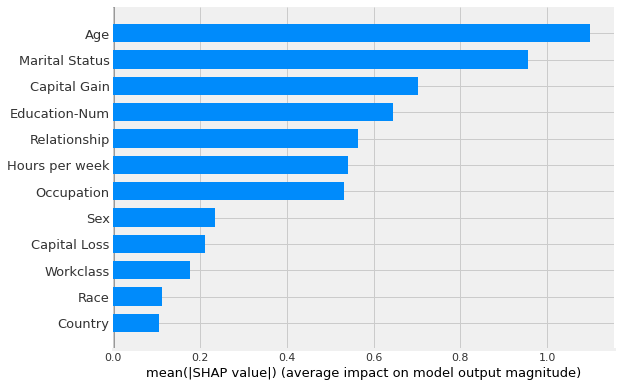

In [34]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

See more possible plots here https://shap.readthedocs.io/en/latest/api_examples.html#plots


Take a look here to learn more aobut XAI and see some existing packages  
* https://github.com/human-centered-ai-lab/cla-Seminar-explainable-AI-2019/blob/master/modules.md
* https://github.com/anguyen8/XAI-papers